# Basic Epidemiology Models

In [1]:
using Petri
using LabelledArrays
using StochasticDiffEq
using OrdinaryDiffEq
using Plots

### SIR Model

The SIR model represents the epidemiological dynamics of an infectious disease
that causes immunity in its victims. There are three *states:* `Suceptible
,Infected, Recovered`. These states interact through two *transitions*.
Infection has the form `S+I -> 2I` where a susceptible person meets an
infected person and results in two infected people. The second transition is
recovery `I -> R` where an infected person recovers spontaneously.

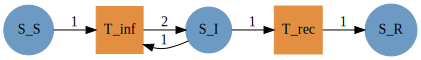

In [2]:
S  = [:S,:I,:R]
Δ  = LVector(
       inf=(LVector(S=1, I=1), LVector(I=2)),
       rec=(LVector(I=1),      LVector(R=1)),
     )
sir = Petri.Model(S, Δ)

Graph(sir)

Once a model is defined, we can define out initial parameters `u0`, a time
span `tspan`, and the transition rates of the interactions `β`

In [3]:
u0 = LVector(S=10.0, I=1.0, R=0.0)
tspan = (0.0,7.5)
β = LVector(inf=0.4, rec=0.4);

Petri.jl provides interfaces to StochasticDiffEq.jl and OrdinaryDiffEq.jl
Here, we call the `SDEProblem` function that returns an StochasticDiffEq
problem object and an appropriate Callback set that can be passed to the
StochasticDiffEq solver which can then be plotted and visualized

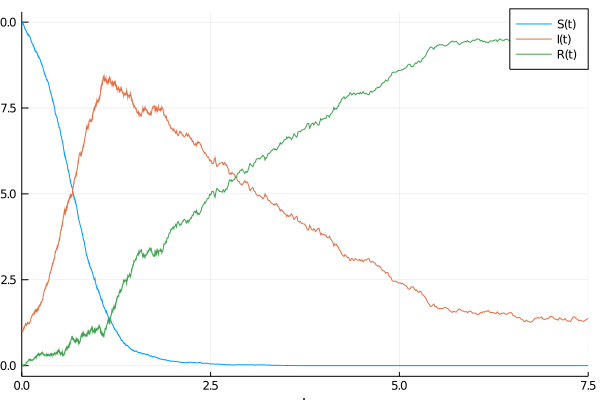

In [4]:
prob, cb = SDEProblem(sir, u0, tspan, β)

sol = StochasticDiffEq.solve(prob,SRA1(),callback=cb)

plot(sol)

Similarly, we can generated `ODEProblem` statements that can be used with
OrdinOrdinaryDiffEq solvers

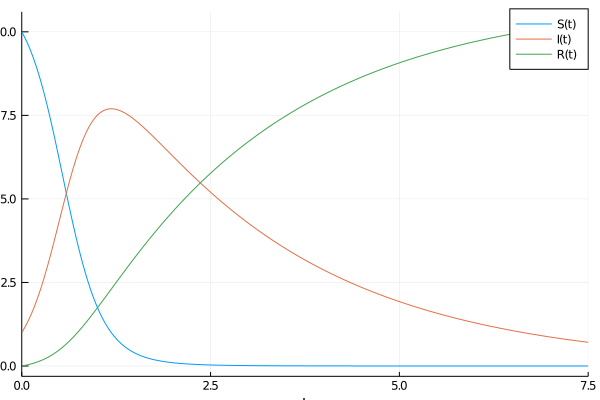

In [5]:
prob = ODEProblem(sir, u0, tspan, β)
sol = OrdinaryDiffEq.solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)

plot(sol)

### SEIR Model

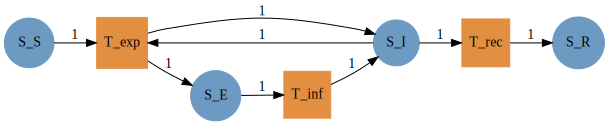

In [6]:
S = [:S,:E,:I,:R]
Δ = LVector(
      exp=(LVector(S=1, I=1), LVector(I=1, E=1)),
      inf=(LVector(E=1),      LVector(I=1)),
      rec=(LVector(I=1),      LVector(R=1)),
    )
seir = Petri.Model(S, Δ)

Graph(seir)

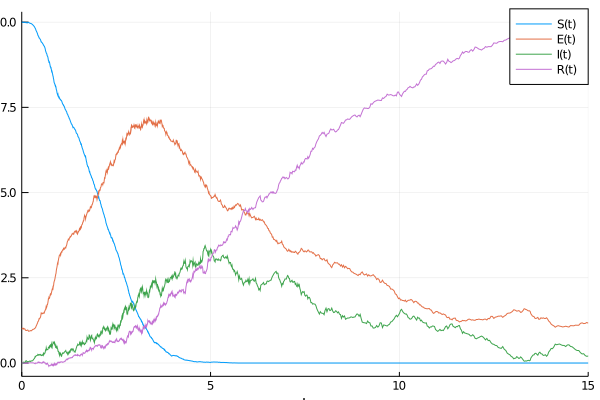

In [7]:
u0 = LVector(S=10.0, E=1.0, I=0.0, R=0.0)
tspan = (0.0,15.0)
β = LVector(exp=0.9, inf=0.2, rec=0.5)

prob, cb = SDEProblem(seir, u0, tspan, β)
sol = StochasticDiffEq.solve(prob,SRA1(),callback=cb)

plot(sol)

### SEIRD Model

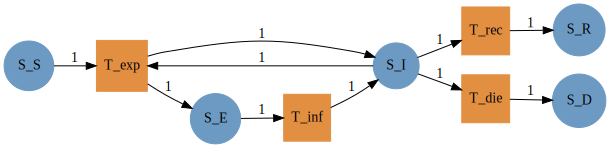

In [8]:
S = [:S,:E,:I,:R, :D]
Δ = LVector(
      exp=(LVector(S=1, I=1), LVector(I=1, E=1)),
      inf=(LVector(E=1),      LVector(I=1)),
      rec=(LVector(I=1),      LVector(R=1)),
      die=(LVector(I=1),      LVector(D=1)),
    )
seird = Petri.Model(S, Δ)

Graph(seird)

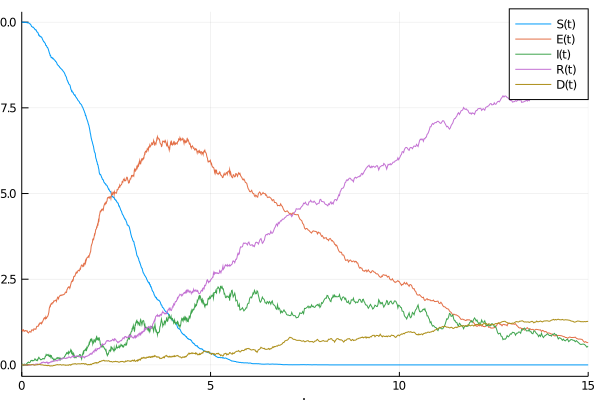

In [9]:
u0 = LVector(S=10.0, E=1.0, I=0.0, R=0.0, D=0.0)
tspan = (0.0,15.0)
β = LVector(exp=0.9, inf=0.2, rec=0.5, die=0.1)

prob, cb = SDEProblem(seird, u0, tspan, β)
sol = StochasticDiffEq.solve(prob,SRA1(),callback=cb)

plot(sol)